# **Neural Style Transfer**
Neural Style Transfer combines the content of one image with the style of another to create visually appealing images. It uses deep learning and convolutional neural networks to extract content and style features. By optimizing a loss function, the generated image gradually transforms, blending different artistic styles with real-world content. It finds applications in art, design, and image editing, allowing users to experiment with various combinations and parameters in real-time.

In [24]:
#loading libraries
import tensorflow_hub as hub
import tensorflow as tf
from matplotlib import pyplot as plt
import numpy as np
import cv2
#setting environment variable for parallel processing
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"


In [25]:
#loading model from tensorflow hub
model = hub.load("https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2")

In [26]:
#to load images and prepare them for processing
def load_image(image_path):
    img = tf.io.read_file(image_path)
    img = tf.image.decode_image(img, channels=3)
    img = tf.image.convert_image_dtype(img, tf.float32)
    img = img[tf.newaxis, :]
    return img


In [27]:
#lodading images from local directory
content_image = load_image("cat.jpg")
style_image = load_image("garden.jpg")

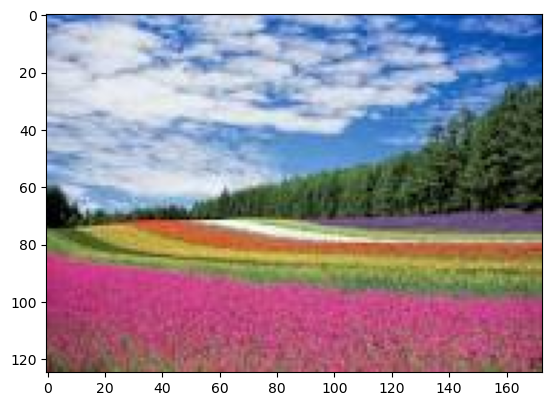

In [28]:
#displaying images and removing batch dimension
plt.imshow(np.squeeze(style_image))
plt.show()


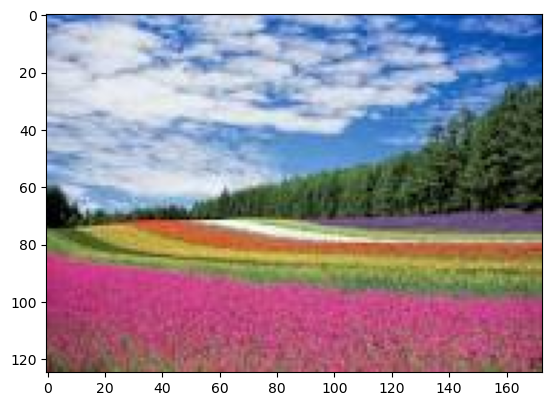

In [29]:
#displaying content image and removing the batch dimension
plt.imshow(np.squeeze(style_image))
plt.show()


In [30]:
#performing style transfer
final_image=model(tf.constant(content_image), tf.constant(style_image))[0]

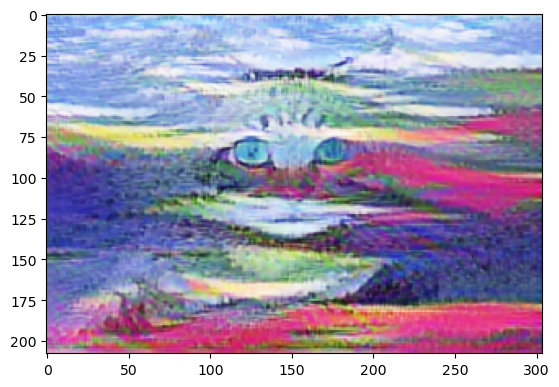

In [31]:
#displaying the final image
plt.imshow(np.squeeze(final_image))
plt.show()

In [32]:
#saving the final image
final_image_uint8 = (np.squeeze(final_image) * 255).astype(np.uint8)
final_image_bgr = cv2.cvtColor(final_image_uint8, cv2.COLOR_RGB2BGR)
cv2.imwrite('saved_img.jpg', final_image_bgr)


True